<a href="https://colab.research.google.com/github/dominicdill/Colab-DS5020/blob/main/Class_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 Class Notes

We'll start working on this next week.

## Exercise #1

* Write a function that reads a generic CSV file from your local filesystem.
  * The function should return a list of dictionary objects.
  * Assume the first row of the CSV file represents the dictionary keys.
  * Each row after the first represents a set of dictionary values, with one dictionary per row.
  * Use that function to read a copy of "penguins.csv" that you get onto your filesystem from [this github repo](https://github.com/allisonhorst/palmerpenguins/tree/master/inst/extdata).
* Use only Python's [built-in functions](https://docs.python.org/3/library/functions.html),
[I/O methods](https://docs.python.org/3/tutorial/inputoutput.html)
and [string methods](https://docs.python.org/3/library/stdtypes.html)

In [1]:
!curl -O "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"   #opens / downloads file to current working directory

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15241  100 15241    0     0  35693      0 --:--:-- --:--:-- --:--:-- 35693


In [2]:
def csv2dict(csvfile):
  penguinlist=[]
  with open(csvfile) as csvfile:                                                  #while loop negates the need for a close statement
    csvkeys = next(csvfile)                                                       #gets the first row
    keylist=list(csvkeys.rstrip('\n').split(","))                                 #turns key string into a key list, splitting up the string on commas, and removes the trailing \n
    for row in csvfile:                                                           #iterate through the rest of the rows for value pairs with the key list
      penguinlist.append(dict(zip(keylist,list(row.rstrip('\n').split(",")))))    #create a dictionary by zipping together values of keylist with values in the newly created list from row x, then append it to a list
  return penguinlist



In [3]:
plist = csv2dict("penguins.csv")


row 4 had a bad value
{'species': 'Adelie', 'island': 'Torgersen', 'bill_length_mm': 'NA', 'bill_depth_mm': 'NA', 'flipper_length_mm': 'NA', 'body_mass_g': 'NA', 'sex': 'NA', 'year': '2007'}
row 272 had a bad value
{'species': 'Gentoo', 'island': 'Biscoe', 'bill_length_mm': 'NA', 'bill_depth_mm': 'NA', 'flipper_length_mm': 'NA', 'body_mass_g': 'NA', 'sex': 'NA', 'year': '2009'}


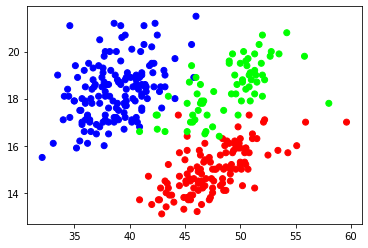

In [4]:
import matplotlib.pyplot as plt
plist = csv2dict("penguins.csv")
x=[] #bill length list
y=[] #bill depth list
z=[] #species list
for count,pdict in enumerate(plist):
  try:
    x.append(float(pdict["bill_length_mm"]))
    y.append(float(pdict["bill_depth_mm"]))
    z.append(pdict['species'])
  except:
    print(f'row {count+1} had a bad value')
    print(pdict)

newz=dict([(value,count+1) for count,value in enumerate(set(z))])                                #https://stackoverflow.com/questions/43203215/map-unique-strings-to-integers-in-python

plt.scatter(x,y,c=[newz[d] for d in z],cmap='brg')

